In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
from importlib import reload

import numpy as np

import sciplots as plots

reload(plots.utils)
reload(plots.base)
reload(plots.clustering)
reload(plots.distributions)
reload(plots.grids)
reload(plots.misc)
reload(plots.pair_plots)
reload(plots.single_plots)
reload(plots)

import sciplots as plots

In [60]:
num = int(1e3)
dims = 4
data = np.random.randn(num, dims)
targets = np.random.randint(0, 2, num)

for target in np.unique(targets):
    idxs = target == targets
    data[idxs, 0] += target

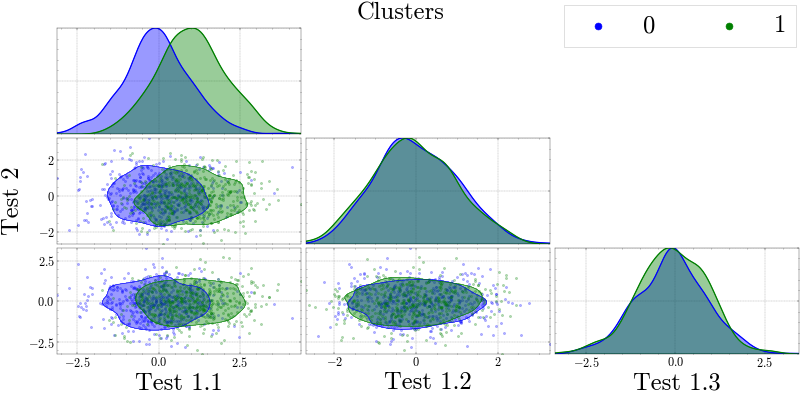

In [61]:
plot = plots.PlotClusters(
    data[:, :3],
    targets,
    density=True,
    norm=True,
    colours=['blue', 'green'],
    labels=np.unique(targets).astype(str).tolist(),
    # axis=True,
    major=40,
    x_label=['Test 1.1', 'Test 1.2', 'Test 1.3'],
    y_label='Test 2',
    title='Clusters',
    loc='upper right',
    fig_size=(8, 4),
)

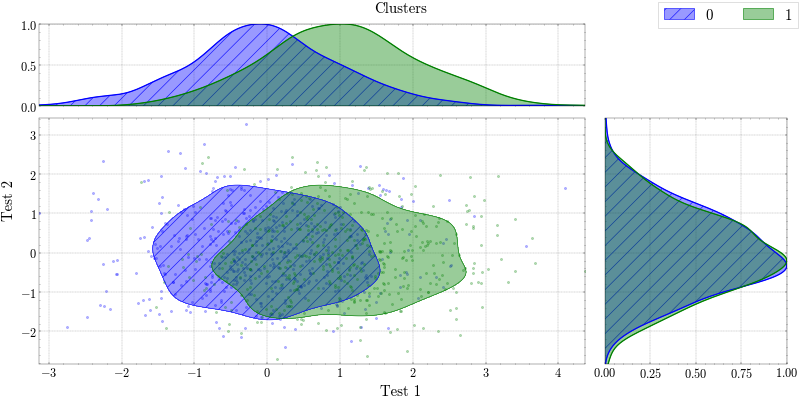

In [62]:
plot = plots.PlotClusters(
    data[:, :2],
    targets,
    density=True,
    norm=True,
    colours=['blue', 'green'],
    hatches=['/', ''],
    labels=np.unique(targets).astype(str).tolist(),
    # axis=True,
    x_label='Test 1',
    y_label='Test 2',
    title='Clusters',
    loc='upper right',
    fig_size=(8, 4),
)

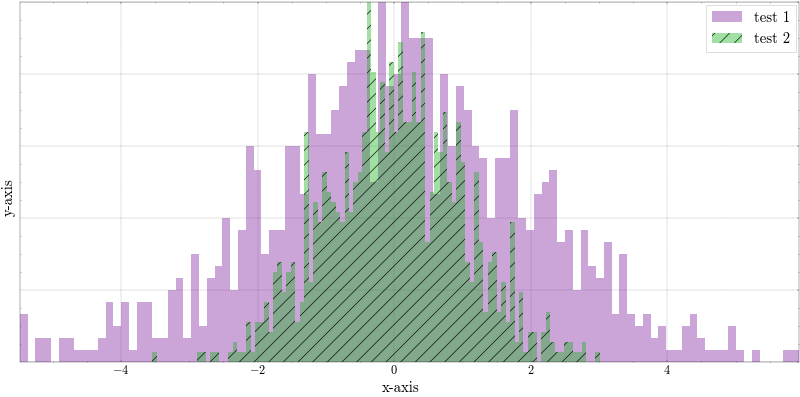

In [63]:
data = np.random.randn(2, 1000)
data[0] *= 2

plot = plots.PlotDistribution(
    data,
    # density=True,
    norm=True,
    x_labels='x-axis',
    y_labels='y-axis',
    hatches=['', '/'],
    labels=['test 1', 'test 2'],
    fig_size=(8, 4),
    axis=True,
    cols=1,
    loc='best',
)

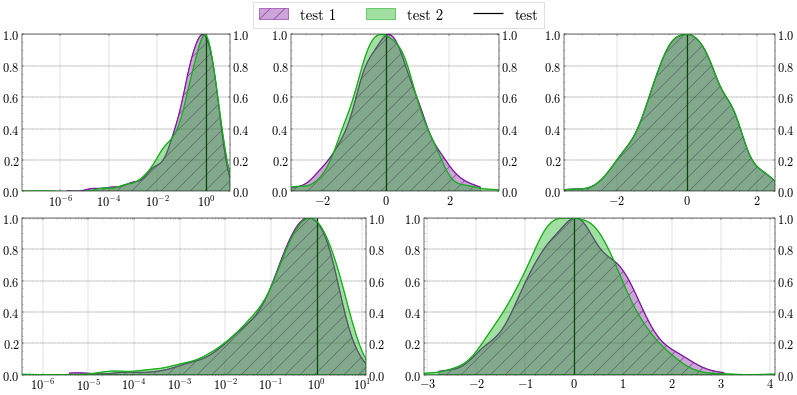

In [64]:
data = np.random.randn(5, 1000)
twin_data = data.copy()[::-1]
data[[0, 3]] **= 2
twin_data[[0, 3]] **= 2

plot = plots.PlotDistributions(
    data,
    density=True,
    norm=True,
    log=[True, False, False, True, False],
    label='test 1',
    hatches=['/', ''],
    fig_size=(8, 4),
)
plot.plot_twin_data(
    twin_data,
    label='test 2',
)
plot.plot_vlines([1, 0, 0, 1, 0], label='test', colour='k')

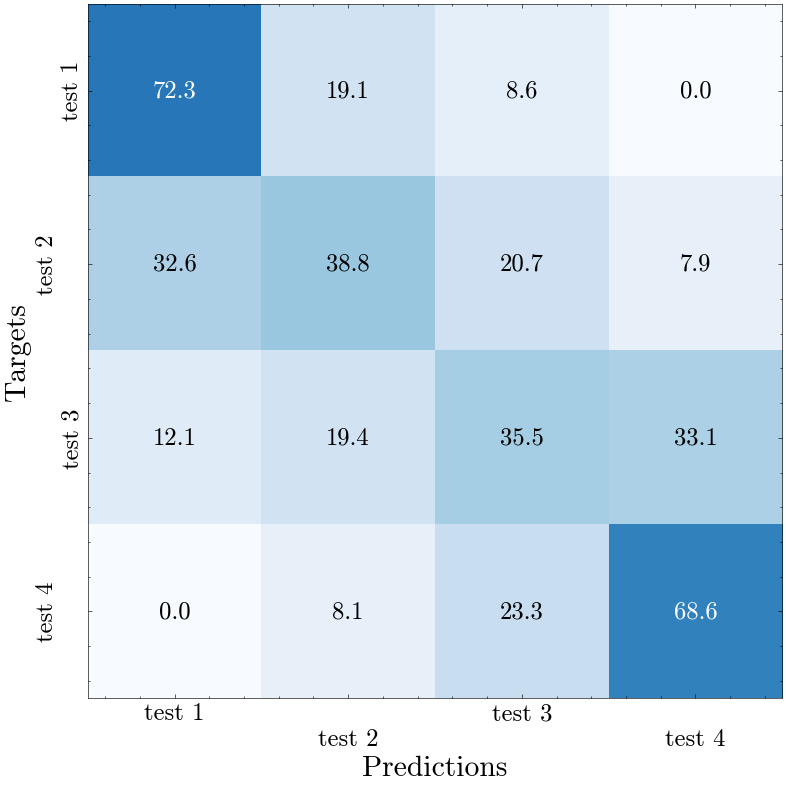

In [65]:
labels = ['test 1', 'test 2', 'test 3', 'test 4']
targets = np.random.randint(0, 4, num)
data = targets + np.random.choice([0, 1, 2, -1, -2], size=num, p=[0.4, 0.2, 0.1, 0.2, 0.1])
data = np.maximum(0, data)
data = np.minimum(3, data)

plot = plots.PlotConfusion(
    labels,
    data,
    targets,
    fig_size=(8, 8),
)

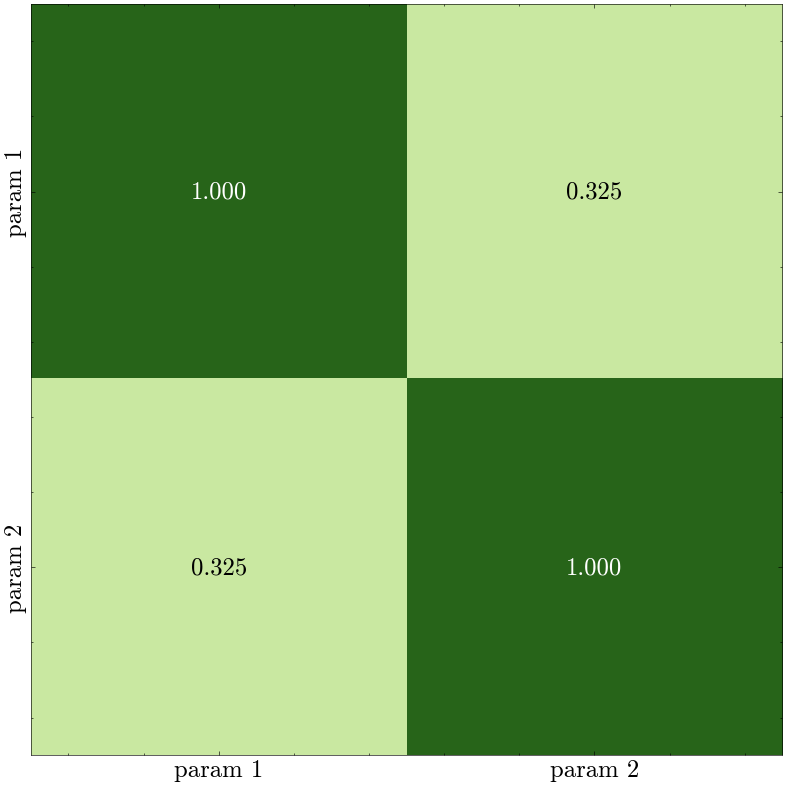

In [66]:
data = np.repeat(np.linspace(0, 1, 100)[:, None], 2, axis=-1).astype(float)
data += np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 0.1]], size=100)
plot = plots.PlotPearson(
    data,
    data,
    x_labels=['param 1', 'param 2'],
    y_labels=['param 1', 'param 2'],
    fig_size=(8, 8),
)

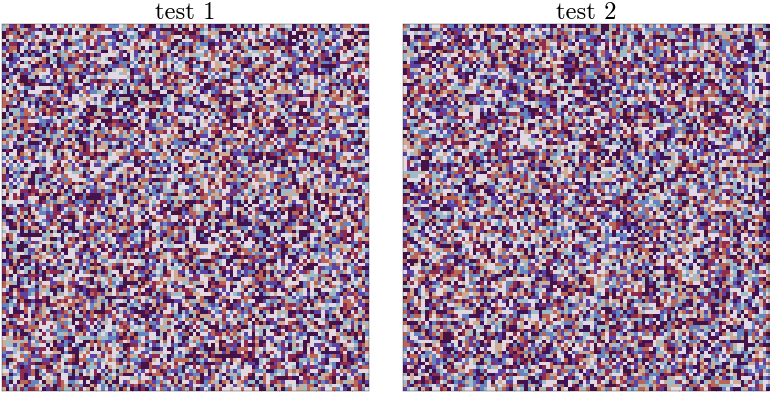

In [67]:
plot = plots.PlotImages(
    np.random.randint(0, 10, size=(3, 100, 100)),
    num_plots=2,
    cmaps='twilight',
    titles=['test 1', 'test 2'],
    major=40,
    fig_size=(8, 4),
)

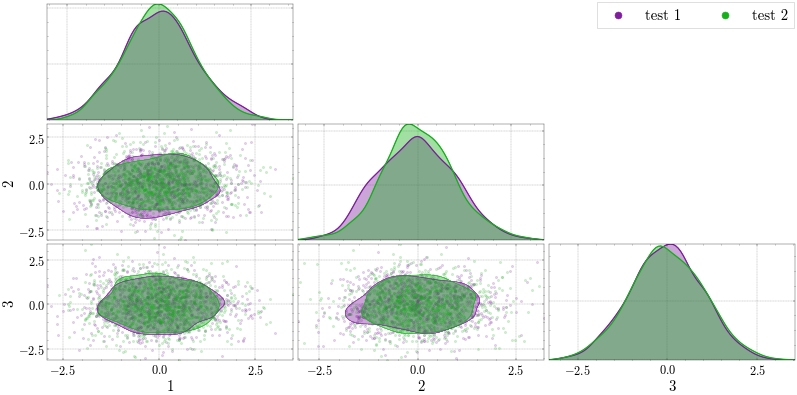

In [68]:
data = np.random.randn(2, 1000, 3)
plot = plots.PlotParamPairs(
    data,
    density=True,
    labels=['test 1', 'test 2'],
    axes_labels=['1', '2', '3'],
    loc='upper right',
    fig_size=(8, 4),
)

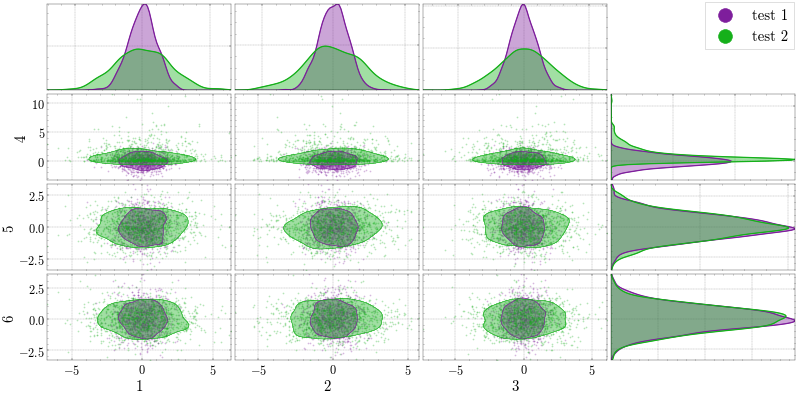

In [69]:
data = np.random.randn(4, 1000, 3)
data[1] *= 2
data[3, :, 0] **= 2
plot = plots.PlotParamPairComparison(
    data[:2],
    data[2:],
    density=True,
    x_labels=['1', '2', '3'],
    y_labels=['4', '5', '6'],
    labels=['test 1', 'test 2'],
    fig_size=(8, 4),
    cols=1,
    loc='upper right',
)

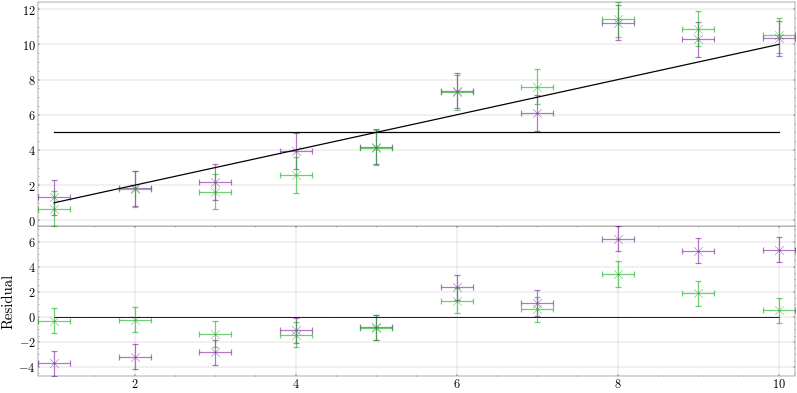

In [70]:
x_data = np.arange(10) + 1
y_data = np.arange(10) + np.random.randn(10) + 1
plot = plots.PlotComparison(
    x_data,
    np.array([y_data, y_data + np.random.randn(10)]),
    residual='residual',
    target=[np.ones_like(x_data) * 5, x_data],
    x_error=np.ones_like(y_data) * 0.2,
    y_error=np.ones_like(y_data),
    pad=0.01,
    fig_size=(8, 4),
)

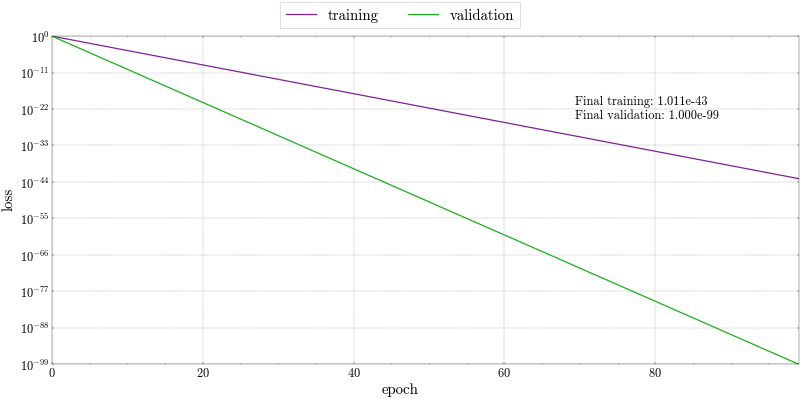

In [71]:
data = [-np.arange(100)] * 2
data[0] = np.exp(data[0])
data[1] = 10. ** data[1]
plot = plots.PlotPerformance(
    data,
    log=True,
    x_label='epoch',
    y_label='loss',
    labels=['training', 'validation'],
    fig_size=(8,4),
)

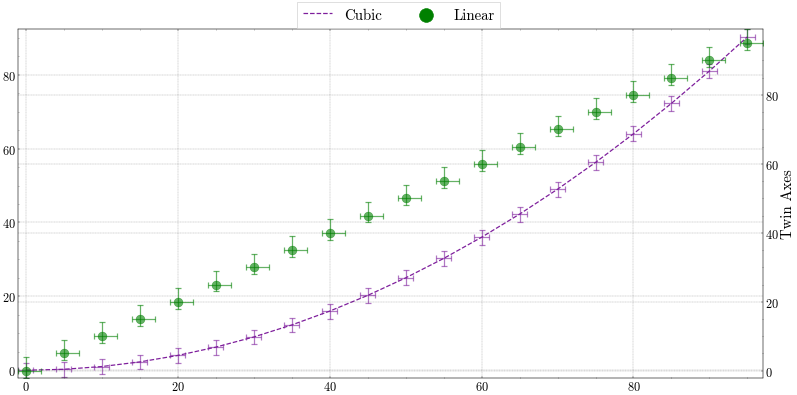

In [72]:
data = np.arange(0, 100, 5)
y_data = [-data] * 2
y_data[0] = y_data[0] ** 2 / 1e2
y_data[1] *= -1

plot = plots.PlotPlots(
    data,
    y_data[0],
    x_error=[np.ones_like(y_data) * 1],
    y_error=[np.ones_like(y_data) * 2],
    labels=['Cubic'],
    styles=['--'],
    fig_size=(8,4),
)
plot.plot_twin_data(
    y_data[1],
    y_label='Twin Axes',
    labels=['Linear'],
    styles=['o'],
    colours=['g'],
    x_error=[np.stack((np.ones_like(y_data[0]) * 1, np.ones_like(y_data[0]) * 2), axis=0)],
    y_error=[np.stack((np.ones_like(y_data[0]) * 2, np.ones_like(y_data[0]) * 4), axis=0)],
)

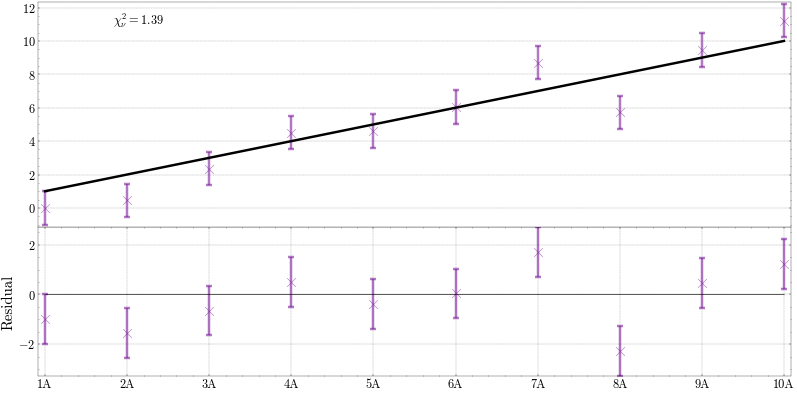

In [73]:
x_data = np.arange(10) + 1
y_data = np.arange(10) + np.random.randn(10) + 1

plot = plots.PlotComparison(
    x_data.astype(str) + 'A',
    y_data, residual='residual',
    target=x_data,
    y_error=np.ones_like(y_data),
    line_width=4,
    eline_width=4,
    fig_size=(8, 4),
)
plot.set_axes_pad(pad=0.01)

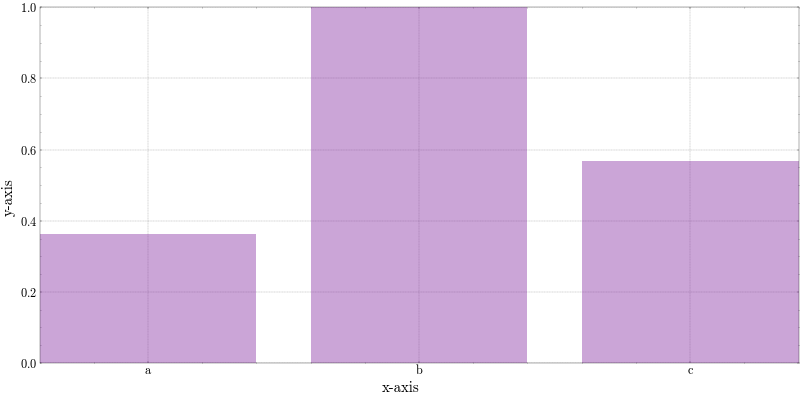

In [74]:
data = np.random.choice(['a', 'b', 'c'], p=[0.2, 0.5, 0.3], size=1000)

plot = plots.PlotDistribution(
    data,
    norm=True,
    y_axes=True,
    x_labels='x-axis',
    y_labels='y-axis',
    fig_size=(8, 4),
)